In [ ]:
# Importacion de las librerias necesarias 
#Vamos a importar las librerías que serán necesarias
import pandas as pd
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt
import operator
import itertools
import datetime

from scipy.optimize import curve_fit



Vamos  a subir el archivo

In [ ]:
df=  pd.read_table('AbrilTotales.csv',sep=',',encoding='utf-8') #leer la matriz
df_matriz=  pd.read_table('2020abril_adjency.csv',sep=',',encoding='utf-8')

In [ ]:
df

,Unnamed: 0,Reporter,Partner,Trade Value (US$),expor,TradeValue,Weight,Type
0,0,Uganda,Spain,1356732.0,5.320466e+06,3.338599e+06,3.338599e+06,Directed
1,1,Uganda,Rep. of Korea,3047408.0,NaN,3.047408e+06,3.047408e+06,Directed
2,2,Uganda,India,54821300.0,2.734912e+07,4.108521e+07,4.108521e+07,Directed
3,3,Uganda,Italy,4878253.0,1.635536e+06,3.256894e+06,3.256894e+06,Directed
4,4,Uganda,Greece,215985.0,6.851840e+05,4.505845e+05,4.505845e+05,Directed
...,...,...,...,...,...,...,...,...
17938,17938,New Caledonia,Malaysia,NaN,7.906177e+06,7.906177e+06,7.906177e+06,Directed
17939,17939,Vanuatu,Malaysia,NaN,1.480420e+05,1.480420e+05,1.480420e+05,Directed
17940,17940,Papua New Guinea,Malaysia,NaN,1.464429e+07,1.464429e+07,1.464429e+07,Directed
17941,17941,Kiribati,Malaysia,NaN,1.380090e+05,1.380090e+05,1.380090e+05,Directed


In [ ]:
df_matriz

,Unnamed: 0,Uganda,Spain,Rep. of Korea,India,Italy,Greece,Iran,Cuba,China,...,Saint Pierre and Miquelon,Bunkers,"Bonaire, Saint Eustatius and Saba",Niue,Holy See (Vatican City State),Heard Island and McDonald Islands,Antarctica,Western Sahara,South Georgia and the South Sandwich Islands,EU-28
0,Uganda,0.0,3.338599e+06,3.047408e+06,4.108521e+07,3.256894e+06,450584.5,18000.0,4454.0,6.787715e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.899765e+07
1,Spain,3905051.5,0.000000e+00,2.148166e+08,1.602862e+08,1.023474e+09,75728609.0,1972841.0,10339354.0,2.369521e+09,...,0.0,10632.0,0.0,100.0,0.0,0.0,8465.0,0.0,9.0,0.000000e+00
2,Rep. of Korea,394773.0,1.470514e+08,0.000000e+00,2.112149e+08,2.841514e+08,24766605.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.213754e+09
3,India,4064818.0,6.641904e+07,8.177533e+08,0.000000e+00,1.677371e+08,5417674.5,20493832.0,0.0,3.032549e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.323290e+09
4,Italy,8794156.0,1.159654e+09,2.585573e+08,2.054027e+08,0.000000e+00,184770591.0,4445334.0,1052399.0,2.549358e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Heard Island and McDonald Islands,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.487000e+03
242,Antarctica,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.075600e+05
243,Western Sahara,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
244,South Georgia and the South Sandwich Islands,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.072970e+05


In [ ]:
Grafo_dirigido_p=nx.from_pandas_edgelist(df,'Reporter','Partner','TradeValue',nx.DiGraph())

Grafo_no_p=nx.from_pandas_edgelist(df,'Reporter','Partner','TradeValue',nx.Graph())

Grafo_no=nx.from_pandas_edgelist(df,'Reporter','Partner',nx.Graph())
Grafo_dirigido=nx.from_pandas_edgelist(df,'Reporter','Partner',nx.DiGraph())

Funciones para los grafos

In [ ]:

# Se define la funcion de distribucion del grado
def degree_dist(G):
    degree = dict(G.degree())
    values_x = sorted(set(degree.values()))
    dist_y = [list(degree.values()).count(x) for x in values_x]
    return values_x, dist_y

def in_out_degree(G):
    in_degree = dict(G.in_degree())
    out_degree = dict(G.out_degree())
    in_x = sorted(set(in_degree.values()))
    out_x = sorted(set(out_degree.values()))
    in_y = [list(in_degree.values()).count(x) for x in in_x]
    out_y = [list(out_degree.values()).count(x) for x in out_x]
    return in_x, in_y, out_x, out_y

def mean_degree(G):
    degree = dict(G.degree())
    array = []
    for i in degree.values():
        array.append(i)
    array = np.asarray(array)
    return np.sum(array)/len(array)

# para fuerza in in_out = 0, para fuerza out in_out = 1, para fuerza en general in_out = 1, creeeooo
def nodal_strength(array, in_out):
    my_array = []
    for i in array:
        count = 0
        for j in array:
            if j[in_out] == i[in_out]:
                for k in j[2].values():
                    count = count +k
        my_array.append((count, i[in_out]))
    my_array = list(set(my_array))
    my_array.sort(reverse = True) 
    return my_array

# Funcion para completar las matrices de adyacencia y poder crear la red.
def what_index_columns(matrix):
    index = []
    columns = []
    for i in matrix.index:
        if i not in matrix.columns:
            columns.append(i)
    for i in matrix.columns:
        if i not in matrix.index:
            index.append(i)
    return index, columns

# Agrega las filas y columnas faltantes     
def index_columns(matrix, index, columns):
    for i in index:
        matrix.loc[i] = 0
    for j in columns:
        matrix[j] = 0
        
# Se calcula la densidad de una red 
def density(G):
    dn = G.number_of_edges()/(len(G)*(len(G)-1))
    return dn

Funciones que voy a necesitar

In [ ]:
# Se define una funcion exponencial para poder ajustar las curvas
def expo(x1, a, b):
    return a*np.exp(-b*x1)

# Se definde la ley de potencias 
def pow_law(x, a, b):
    return a*pow(x, -b)

# Funcion para el R^2
def r_squared(xdata, ydata, popt):
    residuals = ydata - expo(xdata, popt[0], popt[1])
    ss_res = np.sum(residuals**2.0)
    ss_tot = np.sum((ydata-np.mean(ydata))**2.0)
    r = 1 - (ss_res / ss_tot)
    return r

# Se define la funcion que cuenta cada elemento en un areglo
def count(array):
    y_dist = np.asarray([list(array).count(x) for x in np.unique(array)])
    x_dist = np.asarray([x for x in np.unique(array)])
    return x_dist, y_dist

# Cambia los datos de hora a tipo datatime 
def to_time(clmn):
    array = []
    for i in clmn:
        array.append(datetime.datetime.strptime(i, '%H:%M:%S').time())
    return array

# Funcion en la que se aplica el metodo de newman
def newman(array):
    my_array = []
    for i in range(len(array)):
        P = sum(array[i:])
        my_array.append(P)
    return my_array

# Calculo de la entropia de cada funcion
def entropy(array):
    s = 0
    for p_i in array:
        s = s+p_i*np.log(p_i)
    return -s



Grado y análisis de la red

Vamos a analizar el grafo no dirigido

In [ ]:


x, y = degree_dist(Grafo_no_p)
x = np.asarray(x)
y = np.asarray(y)
popt1, pcov1 = curve_fit(expo, xdata = x, ydata = y)
xspace = np.linspace(0,400, num = 400)



/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


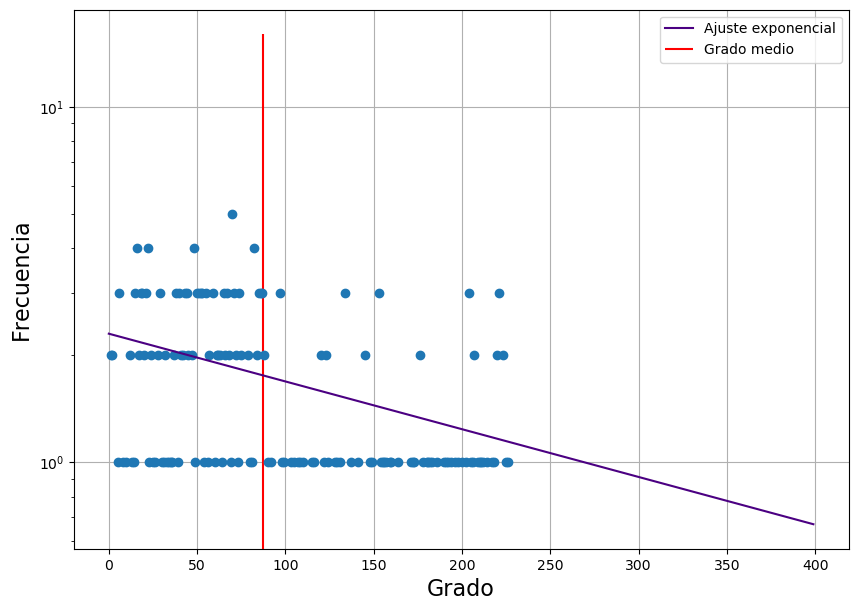

In [ ]:


plt.figure(figsize = (10,7))
plt.semilogy(x, y, 'o')
plt.semilogy(expo(xspace,popt1[0], popt1[1]), color = 'indigo', label = 'Ajuste exponencial')
plt.vlines(mean_degree(Grafo_no_p), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.legend()
plt.grid()
plt.show()



In [ ]:

y_array = np.asarray(y)/sum(y)
popt2, pcov2 = curve_fit(expo, xdata = x, ydata = y_array)
y_newman = newman(y_array)
popt3, pocv3 = curve_fit(expo, xdata = x, ydata = y_newman)



/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:


entropy(y_array)



4.83262236201802

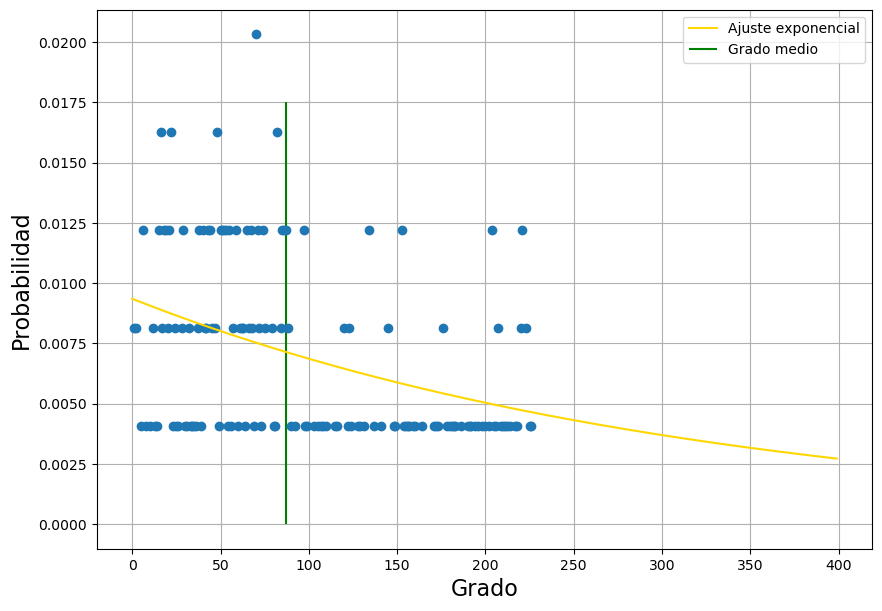

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(x, y_array, 'o')
plt.plot(expo(xspace,popt2[0], popt2[1]), color = 'gold', label = 'Ajuste exponencial')
plt.vlines(mean_degree(Grafo_no_p), 0, 0.0175, color = 'g',label = 'Grado medio')
plt.xlabel('Grado', fontsize=16)
plt.ylabel('Probabilidad', fontsize=16)
plt.legend()
plt.grid()
plt.show()

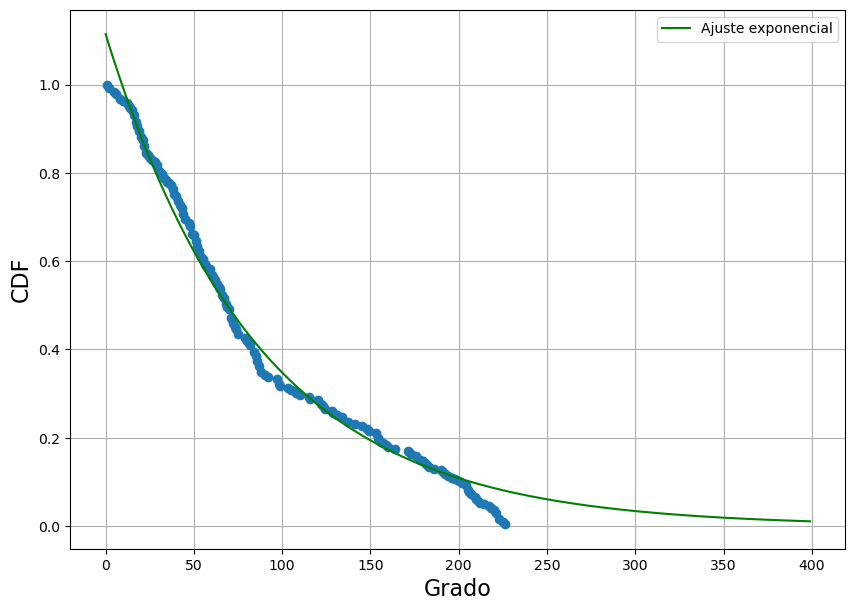

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(x, y_newman, 'o')
plt.plot(expo(xspace,popt3[0], popt3[1]), color = 'g', label = 'Ajuste exponencial')
#plt.vlines(mean_degree(und_unw_graph), 0, 0.0175, color = 'g',label = 'Grado medio')
plt.xlabel('Grado', fontsize=16)
plt.ylabel('CDF', fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [ ]:


# Calculo del R^2 para ambos casos 
print(r_squared(x, y, popt1))
print(r_squared(x, y_array, popt2))
print(r_squared(x, y_newman, popt3))



0.14426011375445302
0.1442601137506645
0.9899542143630968


In [ ]:


popt1



array([2.30060327, 0.0030848 ])

De la gráficas de frecuencias y d eprobabilidad, por la manera en que los puntos están distrbuidos los puntos, podría una intuir que es una distribución de grado exponencial. Aunque no ajusten nada, siento que es porque estoy tomando las medidas equivacadas.
 Efectivamente la estaba embarrando equisde

Mediante el uso de la distribuvión esa acumulativa, pues como que si es una exponencial, en R^2 es 0.989, que es un buen R^2, habría qué buscar los parámetros para los cuales se ajusta.
Para el grafo no dirigido de bienes totales, la distribución de grado es exponencial, lo que nos puede indicar que acá alguna cantidad se conserva, pero qué sera diosss
La distribución nos dice que P=p(X>x)